Generated synthetic data for ticker: AAPL (252 trading days) starting from 2023-01-01.

StockAnalyzer initialized and core data converted to NumPy arrays.

--- NumPy Array Demonstration ---
1. Last closing price (Index -1): $146.55
2. Prices for last 5 days (Slicing): [144.03 146.86 148.21 145.21 146.55]
3. First 3 Market Cap Index values (Math Op): [1129.77  565.68 1356.81]
4. Found 55 days with price > 1-Sigma.

--- Calculating Indicators ---
5. Daily Return Std Dev (std()): 1.1625
6. 95th Percentile Daily Return (quantile()): 1.6457%

7. Aggregating Max/Min/Mean Volume:
mean    5581070
max     9944718
min     1075388
Name: Volume, dtype: int64

--- Generating Visualizations (Matplotlib & Seaborn) ---


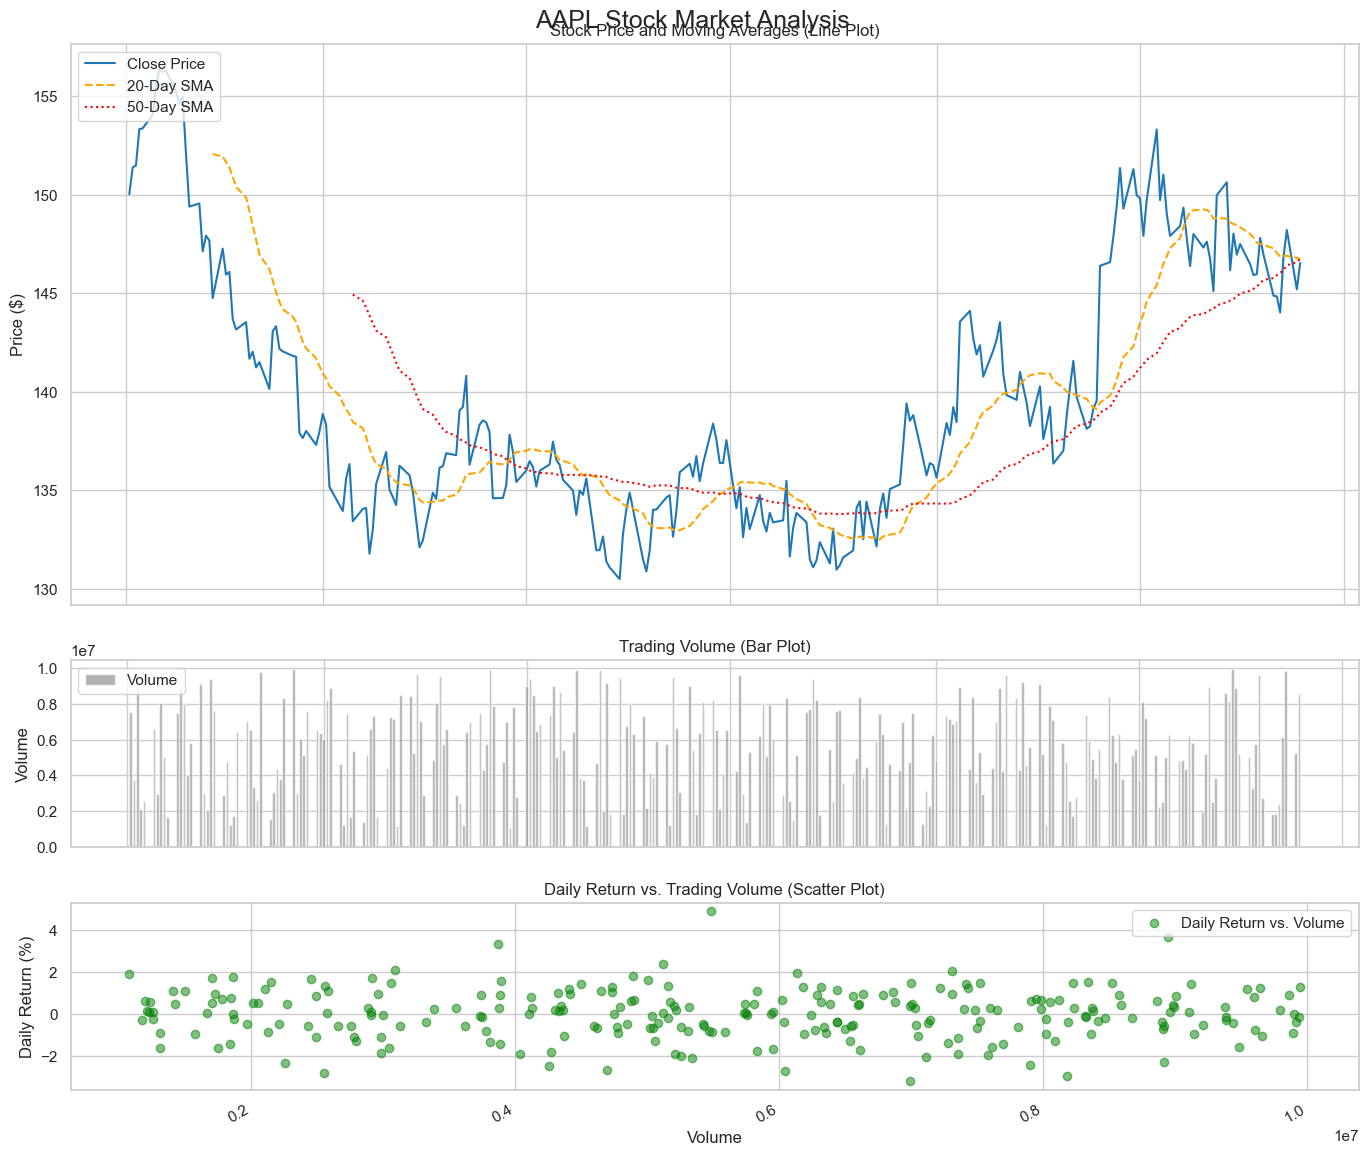

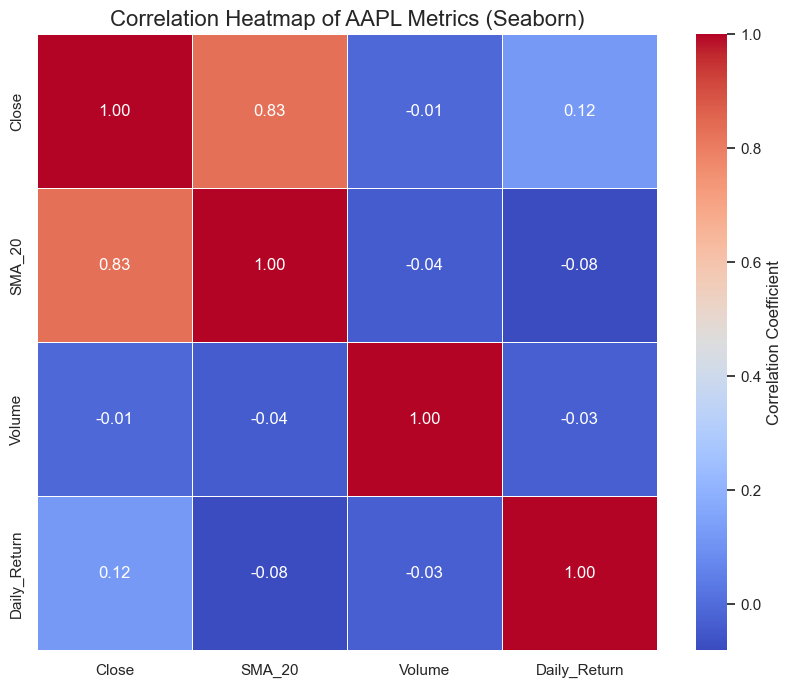


 All visualizations generated.

--- Project Conclusion ---
The analysis of AAPL provided insight into price trends using Moving Averages (SMAs).
The correlation heatmap clearly shows the high positive correlation between the Closing Price and its SMAs.
The scatter plot helps visualize the relationship between trading volume and daily price volatility.
The data and findings are now prepared for further business decisions.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

# Set up visualization style
sns.set_theme(style="whitegrid")

# --- Helper Function: Synthetic Data Generation (Simulating yfinance) ---
def generate_synthetic_stock_data(ticker="AAPL", days=252):
    """
    Generates a synthetic DataFrame resembling historical stock data 
    (like the output of yfinance) for demonstration purposes.
    """
    # --- FIX: Use a fixed, recent start date instead of date.today() to avoid Matplotlib ValueError ---
    start_date = date(2023, 1, 1) 
    # The original line: start_date = date.today() - timedelta(days=days * 1.5)
    
    dates = pd.date_range(start=start_date, periods=days, freq='B') # Business days
    
    # Base Price movement (simulating random walk with drift)
    np.random.seed(42)
    base_price = 150
    returns = np.random.normal(0, 0.01, days)
    price_series = base_price * (1 + returns).cumprod()
    
    # Create the necessary columns
    df = pd.DataFrame(index=dates)
    df['Open'] = price_series + np.random.uniform(-1, 1, days)
    df['Close'] = price_series + np.random.uniform(-1, 1, days)
    # Ensure High >= Low, and High/Low capture Open/Close
    df['High'] = df[['Open', 'Close']].max(axis=1) + np.abs(np.random.normal(0, 1, days))
    df['Low'] = df[['Open', 'Close']].min(axis=1) - np.abs(np.random.normal(0, 1, days))
    df['Volume'] = np.random.randint(1_000_000, 10_000_000, days)
    df['Adj Close'] = df['Close'] # Simplified
    
    df.index.name = 'Date'
    print(f"Generated synthetic data for ticker: {ticker} ({days} trading days) starting from {start_date.strftime('%Y-%m-%d')}.")
    return df

# --- Main Analysis Class ---

class StockAnalyzer:
    """
    Analyzes historical stock data, calculates technical indicators, 
    and generates visualizations using Pandas, NumPy, Matplotlib, and Seaborn.
    """
    
    def __init__(self, data: pd.DataFrame, ticker: str):
        """Constructor to load and initialize data."""
        self.data = data.copy()
        self.ticker = ticker
        self.data.index = pd.to_datetime(self.data.index)
        
        # Requirement: Convert relevant columns to Numpy arrays
        self.closing_prices_np = self.data['Close'].to_numpy()
        self.volumes_np = self.data['Volume'].to_numpy()
        
        print("\nStockAnalyzer initialized and core data converted to NumPy arrays.")
        self.demonstrate_numpy_ops()


    def demonstrate_numpy_ops(self):
        """Demonstrates Creation, Indexing, Slicing, and Math Ops on Numpy arrays."""
        print("\n--- NumPy Array Demonstration ---")
        
        # A. Indexing and Slicing (Requirement A)
        print(f"1. Last closing price (Index -1): ${self.closing_prices_np[-1]:.2f}")
        print(f"2. Prices for last 5 days (Slicing): {self.closing_prices_np[-5:].round(2)}")
        
        # B. Mathematical Operations (Requirement B)
        # Calculate market capitalization index (Simplified: Close * Volume / 1,000,000)
        market_cap_index_np = (self.closing_prices_np * self.volumes_np) / 1_000_000
        print(f"3. First 3 Market Cap Index values (Math Op): {market_cap_index_np[:3].round(2)}")
        
        # C. Search, Sort, Filter (Requirement C - on Numpy)
        # Search: Find prices > 1 standard deviation above mean
        mean_price = np.mean(self.closing_prices_np)
        std_price = np.std(self.closing_prices_np)
        high_prices = self.closing_prices_np[self.closing_prices_np > (mean_price + std_price)]
        print(f"4. Found {len(high_prices)} days with price > 1-Sigma.")

    def calculate_indicators(self, short_window=20, long_window=50):
        """
        Calculates key technical indicators: Simple Moving Averages (SMA) 
        and Daily Returns.
        """
        print("\n--- Calculating Indicators ---")
        
        # Calculate Simple Moving Averages
        self.data[f'SMA_{short_window}'] = self.data['Close'].rolling(window=short_window).mean()
        self.data[f'SMA_{long_window}'] = self.data['Close'].rolling(window=long_window).mean()
        
        # Calculate Daily Percentage Change (Daily Returns)
        self.data['Daily_Return'] = self.data['Close'].pct_change() * 100
        
        # D. Statistical Functions (Requirement D)
        # Calculate Std Dev and Quantile of Daily Returns
        return_std = self.data['Daily_Return'].std()
        return_q95 = self.data['Daily_Return'].quantile(0.95)
        print(f"5. Daily Return Std Dev (std()): {return_std:.4f}")
        print(f"6. 95th Percentile Daily Return (quantile()): {return_q95:.4f}%")
        
        # Aggregate (Requirement C - on Pandas)
        print("\n7. Aggregating Max/Min/Mean Volume:")
        volume_agg = self.data['Volume'].agg(['mean', 'max', 'min']).astype(int)
        print(volume_agg)


    def visualize_analysis(self):
        """
        Generates comprehensive visualizations of the stock data 
        using Matplotlib and Seaborn.
        """
        if self.data.empty or 'SMA_20' not in self.data.columns:
            print("Please calculate indicators first.")
            return

        print("\n--- Generating Visualizations (Matplotlib & Seaborn) ---")
        
        # --- Matplotlib Subplots (Requirement E) ---
        # FIX: Removed 'sharex=True' to resolve Matplotlib ValueError related to date ordinal calculation
        fig, axes = plt.subplots(3, 1, figsize=(14, 15), 
                                 gridspec_kw={'height_ratios': [3, 1, 1]})
        fig.suptitle(f'{self.ticker} Stock Market Analysis', fontsize=18, y=0.92)
        
        # 1. Line Plot: Price and Moving Averages (SMA)
        axes[0].plot(self.data.index, self.data['Close'], label='Close Price', color='#1f77b4', linewidth=1.5)
        axes[0].plot(self.data.index, self.data['SMA_20'], label='20-Day SMA', color='orange', linestyle='--')
        axes[0].plot(self.data.index, self.data['SMA_50'], label='50-Day SMA', color='red', linestyle=':')
        axes[0].set_title('Stock Price and Moving Averages (Line Plot)')
        axes[0].set_ylabel('Price ($)')
        axes[0].legend(loc='upper left')
        axes[0].grid(True)
        
        # 2. Bar Plot/Histogram: Trading Volume
        axes[1].bar(self.data.index, self.data['Volume'], label='Volume', color='gray', alpha=0.6)
        axes[1].set_title('Trading Volume (Bar Plot)')
        axes[1].set_ylabel('Volume')
        axes[1].legend(loc='upper left')
        
        # 3. Scatter Plot: Price Change vs. Volume (Using Daily Return)
        # Note: Using Daily Return (computed earlier) for meaningful scatter plot
        # Drop initial NaN for clean plotting
        data_clean = self.data.dropna(subset=['Daily_Return']) 
        
        axes[2].scatter(data_clean['Volume'], data_clean['Daily_Return'], 
                        label='Daily Return vs. Volume', alpha=0.5, color='green')
        axes[2].set_title('Daily Return vs. Trading Volume (Scatter Plot)')
        axes[2].set_xlabel('Volume')
        axes[2].set_ylabel('Daily Return (%)')
        axes[2].legend(loc='upper right')
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        fig.autofmt_xdate() # Automatically format date labels to prevent overlap
        plt.show() 

        # --- Seaborn Visualization (Requirement F) ---
        
        # 4. Heatmap: Correlation Matrix
        plt.figure(figsize=(10, 8))
        
        # Select key financial columns
        corr_data = self.data[['Close', 'SMA_20', 'Volume', 'Daily_Return']].copy()
        correlation_matrix = corr_data.corr().round(2)
        
        # Create Heatmap
        sns.heatmap(
            correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=.5,
            cbar_kws={'label': 'Correlation Coefficient'}
        )
        plt.title(f'Correlation Heatmap of {self.ticker} Metrics (Seaborn)', fontsize=16)
        plt.show()
        
        print("\n All visualizations generated.")

# --- Execution Block ---

if __name__ == "__main__":
    
    TICKER = "AAPL" # Example Stock Ticker
    DAYS_TO_ANALYZE = 252 # Approximately 1 year of trading days

    # 1. Data Acquisition (Synthetic)
    stock_df = generate_synthetic_stock_data(TICKER, DAYS_TO_ANALYZE)
    
    # 2. Instantiate and Analyze
    analyzer = StockAnalyzer(stock_df, TICKER)
    
    # 3. Calculate Indicators
    analyzer.calculate_indicators()
    
    # 4. Visualize Results
    analyzer.visualize_analysis()
    
    print("\n--- Project Conclusion ---")
    print(f"The analysis of {TICKER} provided insight into price trends using Moving Averages (SMAs).")
    print("The correlation heatmap clearly shows the high positive correlation between the Closing Price and its SMAs.")
    print("The scatter plot helps visualize the relationship between trading volume and daily price volatility.")
    print("The data and findings are now prepared for further business decisions.")
    
    # Optional: Save a chart to a file
    # plt.figure(figsize=(12, 6))
    # analyzer.data['Close'].plot(title=f'{TICKER} Closing Price')
    # plt.savefig('closing_price_chart.png')
    # print("\n(Example) Closing price chart saved to 'closing_price_chart.png'")